In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import r2_score


warnings.filterwarnings('ignore')

In [2]:
# Исходная функция 
def f(x):
    return 6 - 6 * x - x ** 2 - 7 * x ** 3


In [3]:
# Добавим немного шума к исходной прямой
# Создадим 10 подвыборок 
x_datasets = []
y_datasets = []

for i in range(10):
    xx = np.random.uniform(-10, 10, 50) # равномерно распределение значение на интервале от -10 до 10 
    x_datasets.append(xx)
    y_datasets.append([f(i) for i in xx] + np.random.uniform(-1000, 1000, 50)) #добавление шума к каждому y(xi)

<function matplotlib.pyplot.show(close=None, block=None)>

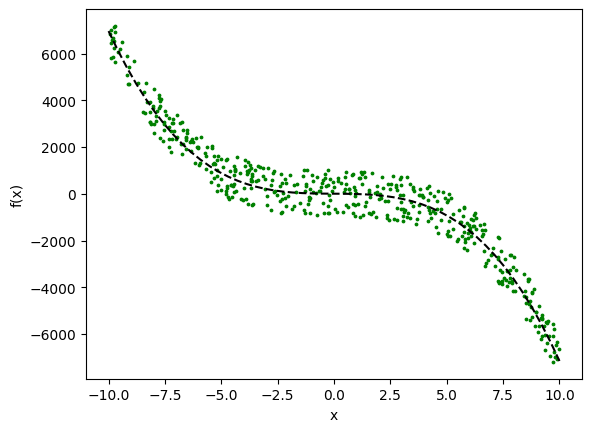

In [4]:
# необходимо найти зависимость зеленых точек
x = np.linspace(-10, 10, 50)
y = f(x)
plt.xlabel('x')
plt.ylabel('f(x)')
for i in range(10):
    plt.scatter(x_datasets[i], y_datasets[i], c = 'green', s = 3)
plt.plot(x, y, '--', color = 'black')
plt.show

In [5]:
# Обучем на каждой подборке дерево решений
models = []
for i in range(10):
    model_tree = tree.DecisionTreeRegressor(max_depth = 8, random_state = 1)
    model_tree.fit(x_datasets[i].reshape(-1, 1), y_datasets[i])
    models.append(model_tree)

In [6]:
# Получили 10 моделей деревьев решений, которые обучены на подвыборках
models

[DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1)]

In [7]:
# Находим прогноз каждого дерева
y_pred = []
for i in range(len(models)):
    y_pred.append(models[i].predict(x.reshape(-1, 1)))

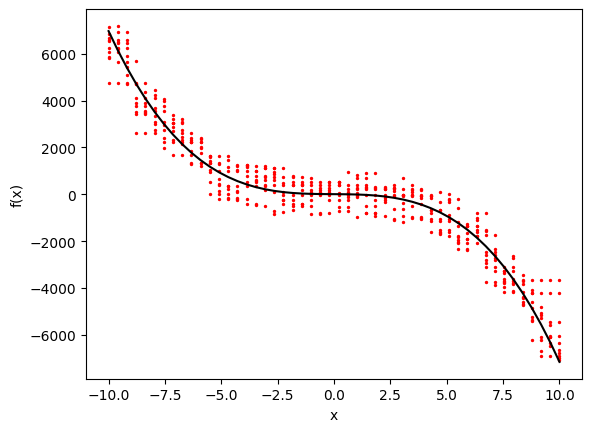

In [8]:
# красные точки -- это то, что прогнозируют деревья
plt.xlabel('x')
plt.ylabel('f(x)')
for i in range(10):
    plt.scatter(x, y_pred[i], c = 'red', s = 2)
plt.plot(x, y, color = 'black')
plt.show()

In [9]:
# берем среднее значение результатов моделей для каждого y(xi)
mean_pred = np.array(y_pred).mean(axis = 0)

In [10]:
mean_pred

array([ 6.25367444e+03,  6.25786838e+03,  5.77826459e+03,  4.11793493e+03,
        3.74683458e+03,  3.48120696e+03,  3.07951402e+03,  2.75424647e+03,
        2.54579523e+03,  2.02172829e+03,  1.88791831e+03,  1.14715234e+03,
        6.65703996e+02,  5.86647799e+02,  4.43772090e+02,  6.90620526e+02,
        5.15921099e+02,  6.04764639e+02,  4.34508440e+02,  1.13796266e+02,
        9.95985525e+01,  1.29702703e+02,  2.54869256e+01, -1.41032095e+01,
        9.40559459e+01,  8.88581101e+01,  3.22960062e+00,  1.29593969e+02,
        6.99582891e+01, -1.57459319e+02, -7.21967748e+01, -1.60398884e+02,
       -2.40305552e+02, -1.72778967e+02, -3.35369409e+02, -6.27954909e+02,
       -1.01866196e+03, -8.73774277e+02, -1.52920459e+03, -1.75904264e+03,
       -1.44325665e+03, -2.32917271e+03, -2.85928159e+03, -3.59766705e+03,
       -3.49407920e+03, -4.15834056e+03, -4.78556361e+03, -5.40814349e+03,
       -5.68511493e+03, -6.01044197e+03])

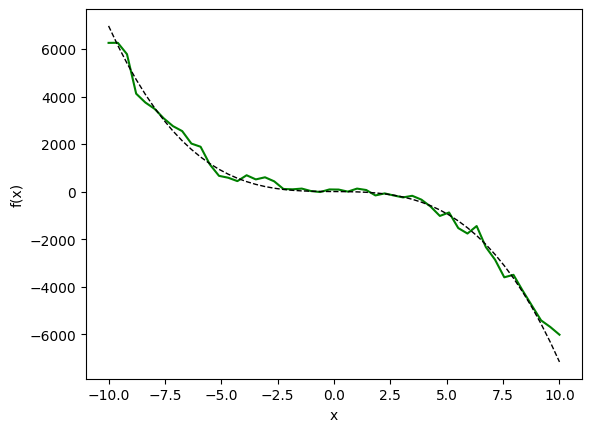

In [11]:
# усредненный результат всех моделей, то есть результат случайного леса
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, mean_pred, c = 'green', zorder = 2)
plt.plot(x, y, '--', color = 'black', lw = 1)
plt.show()

In [12]:
# Обучим все дерево решений на всех моделей данных
model_tree = tree.DecisionTreeRegressor(max_depth = 8, random_state = 1)
one_model = model_tree.fit(np.array(x_datasets).reshape(-1, 1), np.array(y_datasets).reshape(-1, 1))

In [13]:
one_pred = one_model.predict(x.reshape(-1, 1))

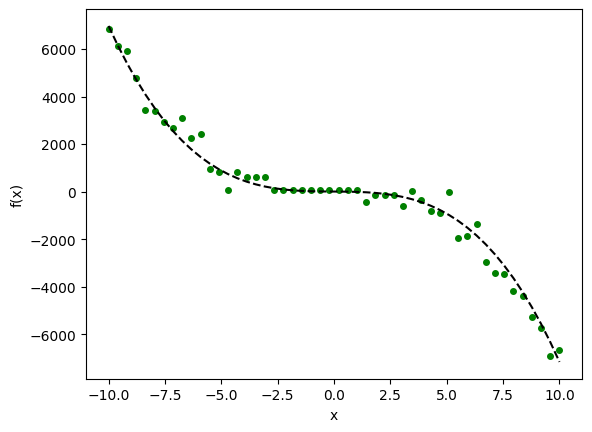

In [14]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(x, one_pred, c = 'green', s = 16, zorder = 2)
plt.plot(x, y, '--', color = 'black', lw = 1.5)
plt.show()

In [15]:
print('R2 для случайного леса', r2_score(mean_pred, f(x)))

R2 для случайного леса 0.9877711062315184


In [16]:
print('R2 для одного дерева', r2_score(one_pred, f(x)))

R2 для одного дерева 0.9806413721260262
